In [96]:
! pip install langchain langgraph

In [97]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph,START,END   #framework that helps you design and manage the flow of tasks in your application

In [98]:
class AgentState(TypedDict):
    number1:int
    operation:str
    number2:int
    finalNumber:int

    

In [99]:
def adder(state:AgentState)->AgentState:
    """this node adds two numbers"""
    #print(state['finalNumber'])
    state['finalNumber'] = state['number1'] + state['number2']


    return state

def subtractor(state:AgentState)->AgentState:
    """this subtract two numbers"""
    # print(state['finalNumber'])
    
    state['finalNumber'] = state['number1'] - state['number2']

    return state



def decide_next_node(state:AgentState) ->AgentState:
    """this node selects next node based on operation"""

    operation_selected = 'addition_operation' if state['operation'] == '+' else 'subtraction_operation'

    return operation_selected

In [100]:
graph = StateGraph(AgentState)


graph.add_node('adder',adder)
graph.add_node('subtractor',subtractor)
graph.add_node('router',lambda state:state) #passthrough function


graph.add_edge(START,'router')

graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
        'addition_operation' : 'adder',
        'subtraction_operation' : 'subtractor'
    }
)

graph.add_edge('adder',END)
graph.add_edge('subtractor',END)
               
app = graph.compile()

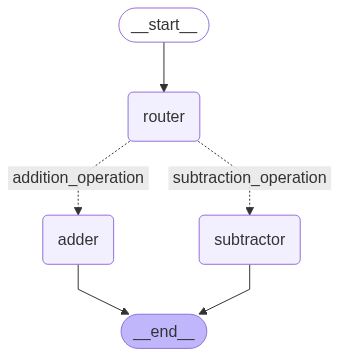

In [101]:
from IPython.display import display ,Image

display(Image(app.get_graph().draw_mermaid_png()))

In [102]:
initial_state = AgentState(number1=10,number2=5,operation='-')
print(app.invoke(initial_state))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}
